In [63]:
import pandas as pd
import numpy as np
import os
import glob
from AngioMorphPCA.io import Get_simple_vtk, makeVtkFile, mkdir
sub1_path = 'D:/!BraVa_src/juntentou/sub01/'
sub2_path = 'D:/!BraVa_src/juntentou/sub02/'
sub3_path = 'D:/!BraVa_src/juntentou/sub03/'

print (glob.glob(sub1_path + '*.csv'))
print (glob.glob(sub2_path + '*.csv'))
print (glob.glob(sub3_path + '*.csv'))

sub1_0 = pd.read_csv(glob.glob(sub1_path + '*.csv')[0])
sub1_1 = pd.read_csv(glob.glob(sub1_path + '*.csv')[1])
sub2_0 = pd.read_csv(glob.glob(sub2_path + '*.csv')[0])
sub2_1 = pd.read_csv(glob.glob(sub2_path + '*.csv')[1])
sub3_0 = pd.read_csv(glob.glob(sub3_path + '*.csv')[0])
sub3_1 = pd.read_csv(glob.glob(sub3_path + '*.csv')[1])

# 定义函数：保留到第二个 r=0 行之前的数据
def filter_before_second_r_zero(df):
    r_zero_count = 0
    second_r_zero_index = None

    for index, row in df.iterrows():
        if row['r'] == 0:
            r_zero_count += 1
            if r_zero_count == 2:  # 找到第二个 r = 0 的行
                second_r_zero_index = index
                break

    # 如果找到第二个 r=0 行，则保留之前的数据
    if second_r_zero_index is not None:
        df = df.iloc[:second_r_zero_index]
    
    return df

# 对所有变量应用该函数
sub1_0 = filter_before_second_r_zero(sub1_0)
sub1_1 = filter_before_second_r_zero(sub1_1)
sub2_0 = filter_before_second_r_zero(sub2_0)
sub2_1 = filter_before_second_r_zero(sub2_1)



# print (sub3_0)
# print (sub3_1)

['D:/!BraVa_src/juntentou/sub01\\40+67+68_mirrored_g.csv', 'D:/!BraVa_src/juntentou/sub01\\47+60+61.csv']
['D:/!BraVa_src/juntentou/sub02\\40+68+66_mirrored_g.csv', 'D:/!BraVa_src/juntentou/sub02\\47+60+61.csv']
['D:/!BraVa_src/juntentou/sub03\\sub03ica_left.csv', 'D:/!BraVa_src/juntentou/sub03\\sub03ica_right.csv']


In [64]:
def interpolate_dataframe(data, n):
    """
    Interpolates each column of a DataFrame to have exactly n points.

    Parameters:
        data (pd.DataFrame): Original DataFrame with numerical data to interpolate.
        n (int): Number of points to interpolate.

    Returns:
        pd.DataFrame: A new DataFrame with n interpolated points for each column.
    """
    interpolated_data = {}
    original_indices = np.linspace(0, 1, len(data))
    target_indices = np.linspace(0, 1, n)
    
    for column in data.columns:
        # Perform interpolation for each column
        interpolated_data[column] = np.interp(target_indices, original_indices, data[column])
    
    # Create a new DataFrame with interpolated data
    interpolated_df = pd.DataFrame(interpolated_data)
    return interpolated_df

def reverse_dataframe(data):
    """
    Reverses the order of rows in a DataFrame.

    Parameters:
        data (pd.DataFrame): The DataFrame to reverse.

    Returns:
        pd.DataFrame: A new DataFrame with the rows reversed.
    """
    return data.iloc[::-1].reset_index(drop=True)

def shift_to_origin(data):
    """
    Moves the center of mass of the curve to the origin (0, 0, 0).

    Parameters:
        data (pd.DataFrame): DataFrame containing x, y, z coordinates.

    Returns:
        pd.DataFrame: A new DataFrame with the center of mass moved to (0, 0, 0).
    """
    # Calculate the center of mass for x, y, z
    center_of_mass = data[['x', 'y', 'z']].mean()
    
    # Shift all points to move the center of mass to (0, 0, 0)
    data[['x', 'y', 'z']] = data[['x', 'y', 'z']] - center_of_mass.values
    
    return data

n_points = 120

sub3_0 = interpolate_dataframe(sub3_0, n_points)
sub3_1 = interpolate_dataframe(sub3_1, n_points)
    
sub3_0 = sub3_0.iloc[:102]
sub3_1 = sub3_1.iloc[:100] 

sub3_0 = interpolate_dataframe(sub3_0, n_points)
sub3_1 = interpolate_dataframe(sub3_1, n_points)


# Reverse
sub3_0 = reverse_dataframe(sub3_0)
sub3_1 = reverse_dataframe(sub3_1)
# Shift to origin
sub3_0 = shift_to_origin(sub3_0)
sub3_1 = shift_to_origin(sub3_1)




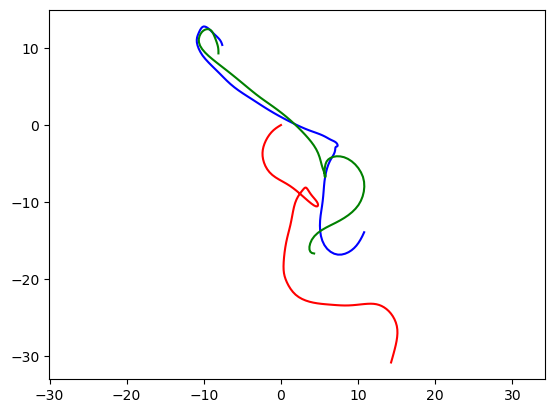

             x          y          z         r  curvature   torsion
0    10.783835 -13.898798  19.951290  2.390029   0.128983  0.029054
1    10.547785 -14.406843  19.677896  2.332175   0.131031  0.032220
2    10.302710 -14.867173  19.334057  2.220636   0.135260  0.034284
3    10.048319 -15.275739  18.912446  2.198443   0.142423  0.034593
4     9.778515 -15.635740  18.426370  2.248455   0.153064  0.032846
..         ...        ...        ...       ...        ...       ...
115  -7.734165  10.722209 -22.137413  3.239761   0.048052 -0.057365
116  -7.694058  10.628705 -22.795719  3.209871   0.050037 -0.042255
117  -7.661554  10.541124 -23.468029  3.238276   0.051650 -0.031734
118  -7.634593  10.457950 -24.150235  2.805533   0.052814 -0.025814
119  -7.609930  10.377320 -24.838104  0.000000   0.053743 -0.022820

[120 rows x 6 columns]


In [ ]:
import matplotlib.pyplot as plt

ref_path = 'D:/!BraVa_src/ica_results/brava_cut_mirrored/sub1_0_rotation_interpolation.vtk' 
ref_vtk = Get_simple_vtk(ref_path)
plt.plot(ref_vtk[:,0], ref_vtk[:,1], 'r-')
plt.plot(sub3_0['x'], sub3_0['y'], 'b-')
plt.plot(sub3_1['x'], sub3_1['y'], 'g-')
plt.axis('equal')
plt.show()

print (sub3_0)


[[ -8.50711078  16.06637055 -19.41706624]
 [ -9.03543609  16.12226143 -19.09099511]
 [ -9.52034273  16.14719196 -18.6980129 ]
 [ -9.95777589  16.13896403 -18.2311291 ]
 [-10.35484581  16.0937575  -17.70296486]
 [-10.72412615  16.00558678 -17.13638215]
 [-11.07943988  15.86676159 -16.55750376]
 [-11.43488695  15.66502522 -15.99591351]
 [-11.77235433  15.39342459 -15.46695248]
 [-12.05846849  15.05638803 -14.96564352]
 [-12.2638899   14.65116513 -14.49139234]
 [-12.36335611  14.17914047 -14.04595771]
 [-12.34206247  13.65083701 -13.63698416]
 [-12.20125517  13.09002807 -13.28097983]
 [-11.93214725  12.53307965 -13.01413314]
 [-11.5591037   12.01462902 -12.84955201]
 [-11.10363178  11.54660696 -12.78356409]
 [-10.586651    11.13052611 -12.80493258]
 [-10.03033957  10.76515467 -12.89876248]
 [ -9.45600761  10.44905755 -13.04957356]
 [ -8.88351989  10.18038258 -13.24160785]
 [ -8.31512959   9.94178864 -13.44905549]
 [ -7.74600051   9.70734017 -13.64299372]
 [ -7.17354876   9.4610393  -13.80

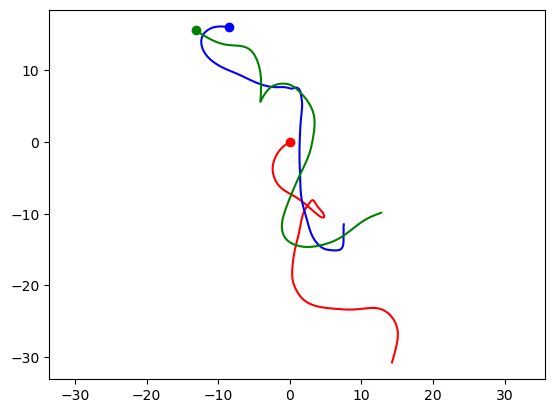

In [67]:
from scipy.spatial import procrustes

def procrustes_alignment(source, target):
    """
    Aligns the source curve to the target curve using Procrustes analysis,
    and rescales the aligned curve to the original scale of the source.

    Parameters:
        source (np.ndarray): Source curve, shape (n, 3).
        target (np.ndarray): Target curve, shape (n, 3).

    Returns:
        np.ndarray: Rescaled aligned source curve, shape (n, 3).
        float: Disparity value from Procrustes analysis.
    """
    # Perform Procrustes analysis
    mtx1, mtx2, disparity = procrustes(target, source)
    
    # Calculate the scaling factor from the source curve
    scale = np.linalg.norm(source) / np.linalg.norm(mtx2)
    
    # Rescale the aligned curve back to the original scale
    aligned_source_rescaled = mtx2 * scale
    
    return aligned_source_rescaled, disparity



aligned_sub_3_0, disparity = procrustes_alignment(sub3_0[['x', 'y', 'z']].to_numpy(), ref_vtk)
aligned_sub_3_1, disparity = procrustes_alignment(sub3_1[['x', 'y', 'z']].to_numpy(), ref_vtk)

print (aligned_sub_3_0)


plt.plot(ref_vtk[:,0], ref_vtk[:,1], 'r-')
plt.plot(aligned_sub_3_0[:,0], aligned_sub_3_0[:,1], 'b-')
plt.plot(aligned_sub_3_1[:,0], aligned_sub_3_1[:,1], 'g-')
plt.scatter(ref_vtk[0,0], ref_vtk[0,1], c='r')
plt.scatter(aligned_sub_3_0[0,0], aligned_sub_3_0[0,1], c='b')
plt.scatter(aligned_sub_3_1[0,0], aligned_sub_3_1[0,1], c='g')
plt.axis('equal')
plt.show()

In [70]:

makeVtkFile('D:/!BraVa_src/juntentou/sub3_0.vtk', aligned_sub_3_0, [])
makeVtkFile('D:/!BraVa_src/juntentou/sub3_1.vtk', aligned_sub_3_1, [])

In [68]:
# 生成VTK文件内容
# def generate_vtk(data, filename):
#     with open(filename, 'w') as vtk_file:
#         vtk_file.write("# vtk DataFile Version 3.0\n")
#         vtk_file.write("Curve data\n")
#         vtk_file.write("ASCII\n")
#         vtk_file.write("DATASET POLYDATA\n")
        
#         # 写入点数据
#         num_points = len(data)
#         vtk_file.write(f"POINTS {num_points} float\n")
#         for index, row in data.iterrows():
#             vtk_file.write(f"{row['x']} {row['y']} {row['z']}\n")
        
#         # 写入拓扑数据
#         vtk_file.write(f"LINES 1 {num_points + 1}\n")
#         vtk_file.write(f"{num_points} " + " ".join(map(str, range(num_points))) + "\n")
        
#         # 写入点数据属性
#         vtk_file.write(f"POINT_DATA {num_points}\n")
        
#         # 写入 r 数据
#         vtk_file.write("SCALARS r float 1\n")
#         vtk_file.write("LOOKUP_TABLE default\n")
#         for value in data['r']:
#             vtk_file.write(f"{value}\n")
        
#         # 写入 curvature 数据
#         vtk_file.write("SCALARS curvature float 1\n")
#         vtk_file.write("LOOKUP_TABLE default\n")
#         for value in data['curvature']:
#             vtk_file.write(f"{value}\n")
        
#         # 写入 torsion 数据
#         vtk_file.write("SCALARS torsion float 1\n")
#         vtk_file.write("LOOKUP_TABLE default\n")
#         for value in data['torsion']:
#             vtk_file.write(f"{value}\n")

def generate_vtk(data, filename):
    num_points = len(data)  # 校验点数
    with open(filename, 'w') as vtk_file:
        vtk_file.write("# vtk DataFile Version 3.0\n")
        vtk_file.write("Curve data\n")
        vtk_file.write("ASCII\n")
        vtk_file.write("DATASET POLYDATA\n")
        
        # 写入点数据
        vtk_file.write(f"POINTS {num_points} float\n")
        for index, row in data.iterrows():
            vtk_file.write(f"{row['x']} {row['y']} {row['z']}\n")
        
        # 写入拓扑数据
        vtk_file.write(f"LINES 1 {num_points + 1}\n")
        vtk_file.write(f"{num_points} " + " ".join(map(str, range(num_points))) + "\n")
        
        # 写入点数据属性
        vtk_file.write(f"POINT_DATA {num_points}\n")
        
        # 写入 r 数据
        vtk_file.write("SCALARS r float 1\n")
        vtk_file.write("LOOKUP_TABLE default\n")
        for value in data['r']:
            vtk_file.write(f"{value}\n")
        
        # 写入 curvature 数据
        vtk_file.write("SCALARS curvature float 1\n")
        vtk_file.write("LOOKUP_TABLE default\n")
        for value in data['curvature']:
            vtk_file.write(f"{value}\n")
        
        # 写入 torsion 数据
        vtk_file.write("SCALARS torsion float 1\n")
        vtk_file.write("LOOKUP_TABLE default\n")
        for value in data['torsion']:
            vtk_file.write(f"{value}\n")

    print(f"Generated VTK file with {num_points} points.")


# 调用函数生成 VTK 文件


# generate_vtk(sub1_0, 'D:/!BraVa_src/juntentou/sub1_0.vtk')
# generate_vtk(sub1_1, 'D:/!BraVa_src/juntentou/sub1_1.vtk')
# generate_vtk(sub2_0, 'D:/!BraVa_src/juntentou/sub2_0.vtk')
# generate_vtk(sub2_1, 'D:/!BraVa_src/juntentou/sub2_1.vtk')
generate_vtk(aligned_sub_3_0, 'D:/!BraVa_src/juntentou/sub3_0.vtk')
generate_vtk(aligned_sub_3_0, 'D:/!BraVa_src/juntentou/sub3_1.vtk')



AttributeError: 'numpy.ndarray' object has no attribute 'iterrows'